In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, '..', 'data')
file_path = os.path.join(data_dir, 'youtoxic_english_1000.csv')

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.shape

(1000, 15)

In [6]:
df.head

<bound method NDFrame.head of                 CommentId      VideoId  \
0    Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1    Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2    Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3    Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4    Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   
..                    ...          ...   
995  Ugi5ADt10EdDz3gCoAEC  XRuCW80L9mA   
996  Ugifh2DMhBbDkHgCoAEC  XRuCW80L9mA   
997  Ugj_plbGBjjzYXgCoAEC  XRuCW80L9mA   
998  Ugj0bah1De8xy3gCoAEC  XRuCW80L9mA   
999  UgjBJKQSoQMQ6ngCoAEC  XRuCW80L9mA   

                                                  Text  IsToxic  IsAbusive  \
0    If only people would just take a step back and...    False      False   
1    Law enforcement is not trained to shoot to app...     True       True   
2    \nDont you reckon them 'black lives matter' ba...     True       True   
3    There are a very large number of people who do...    False      False   
4    The Arab dude is absolutely right, he should h...    False      False 

In [7]:
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Porcentaje NaN'])

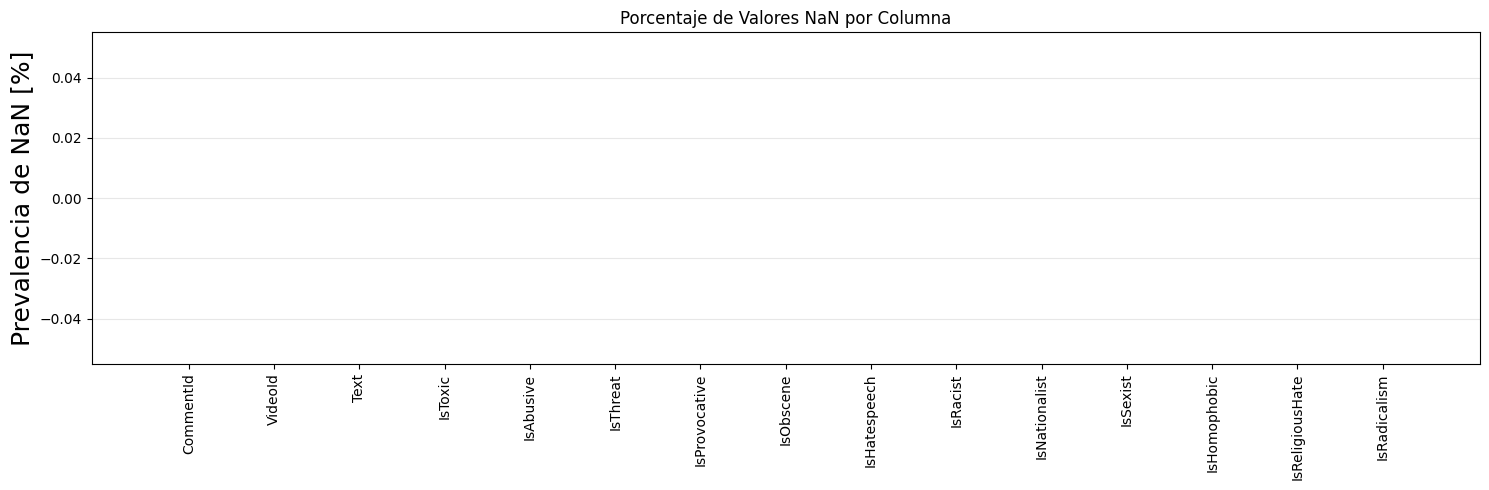

In [8]:
# Graficar porcentajes de NaN
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_nans)), df_nans['Porcentaje NaN'].values)
plt.xticks(np.arange(len(df_nans)), df_nans.index, rotation='vertical')
plt.ylabel('Prevalencia de NaN [%]', fontsize=18)
plt.title('Porcentaje de Valores NaN por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
plt.close()

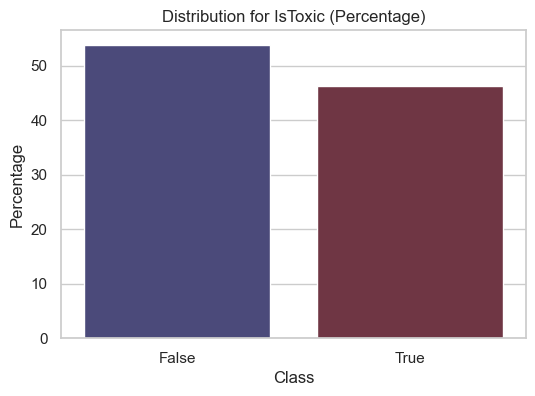

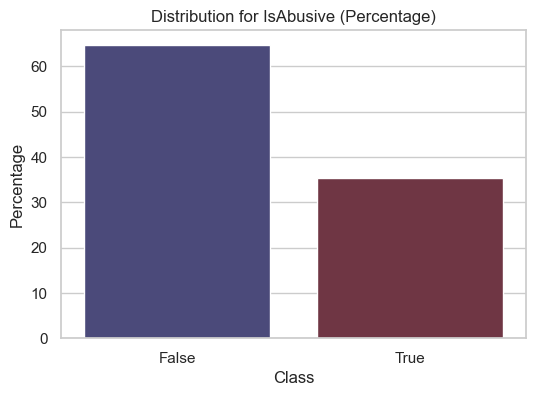

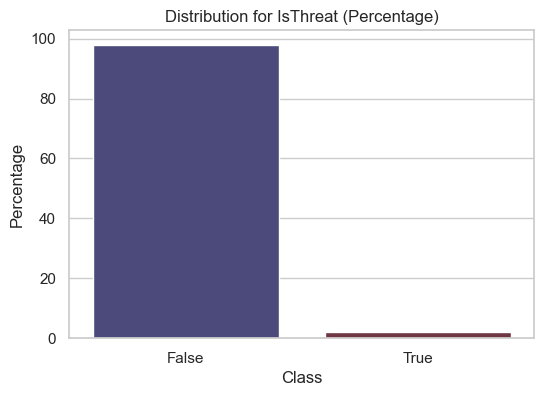

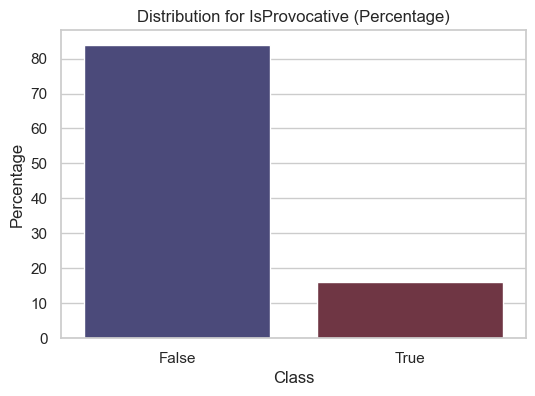

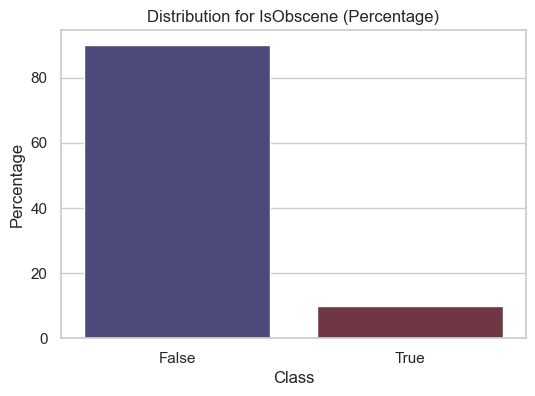

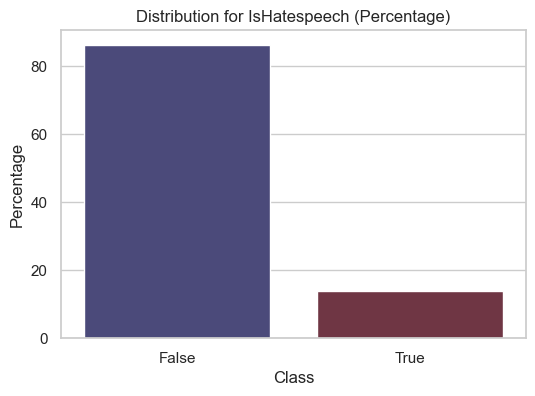

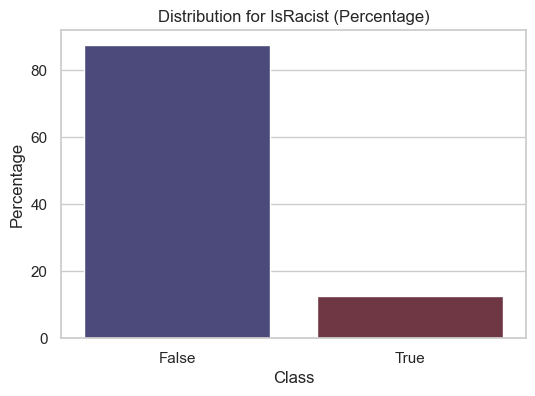

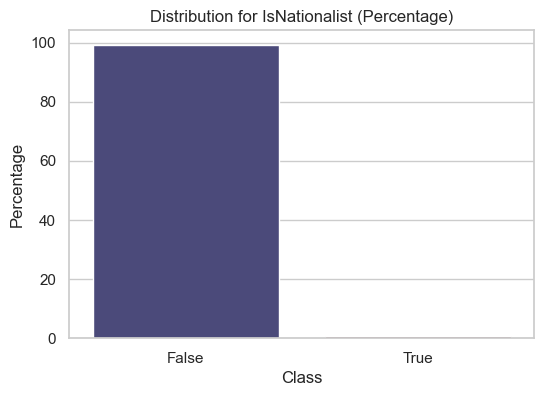

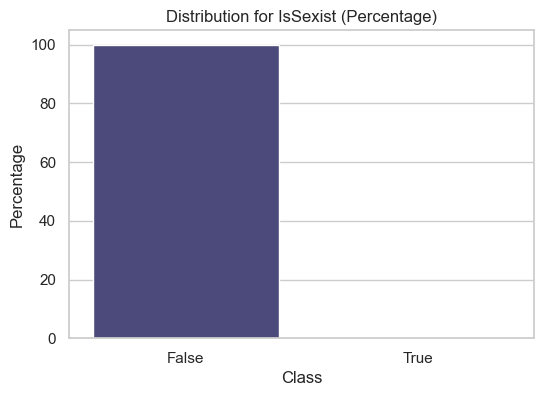

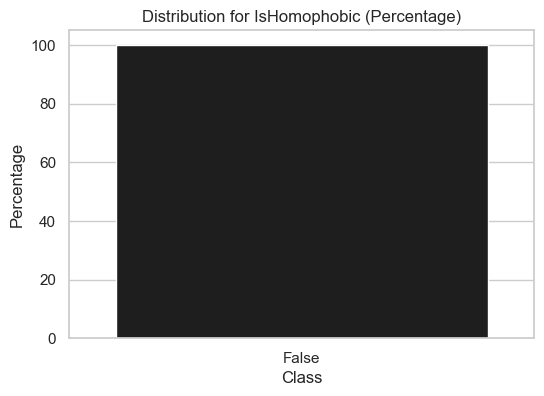

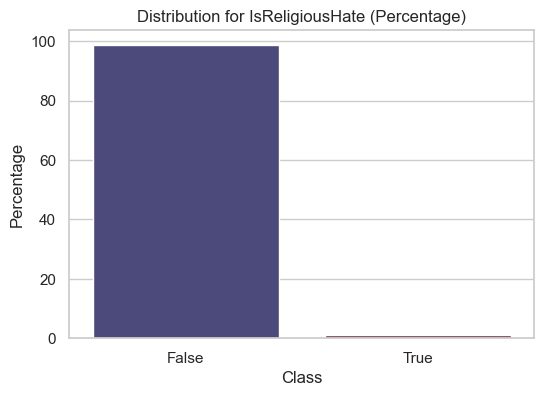

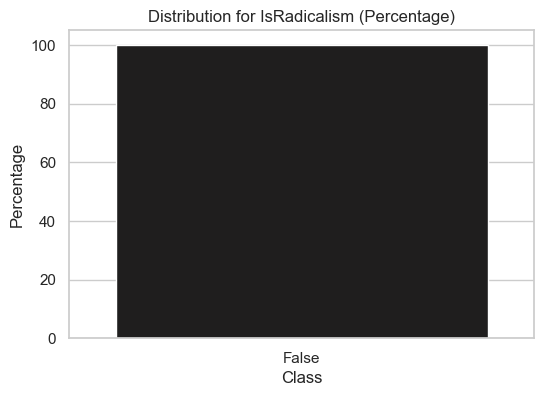

In [19]:
target_columns = [col for col in df.columns if col.startswith('Is')]

sns.set_theme(style="whitegrid")

for col in target_columns:

    class_counts = df[col].value_counts(normalize=True) * 100  

    class_df = pd.DataFrame({col: class_counts.index, 'Percentage': class_counts.values})

    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=col, hue = col, y='Percentage', data=class_df, palette='icefire', legend=False)

    plt.title(f'Distribution for {col} (Percentage)')
    plt.xlabel('Class')
    plt.ylabel('Percentage')

    plt.show()




Las distribuciones de variables objetivo indican diferentes niveles de desequilibrio de clases. Algunas columnas, como IsSexist, IsHomophobic, IsNationalist y IsRadicalism, presentan un desequilibrio extremo donde la clase mayoritaria (False) domina de manera abrumadora. Otras, como IsToxic, IsAbusive y IsThreat, tienen distribuciones más equilibradas, pero aún muestran cierto nivel de desequilibrio.